In [17]:
from STL_to_path import *
from GPT import *
from NL_to_STL import *
from visualization import *

In [18]:
T_max = 30              # time horizon in seconds 
dt = 0.3                # time step in seconds
max_acc = 50            # maximum acceleration in m/s^2
max_speed = 0.5         # maximum speed in m/s
N = int(T_max/dt)       # number of time steps
print("N = ", N)

N =  100


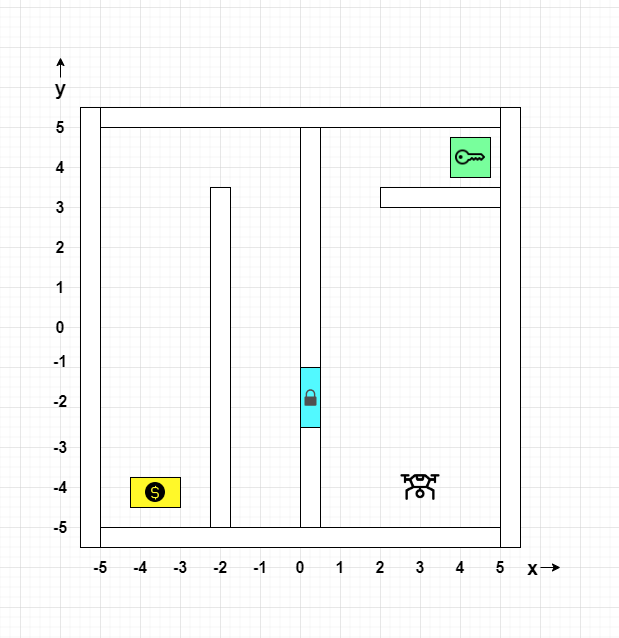

In [19]:
from IPython.display import Image 
image_path = '../Treasure_hunt.png'                 # path to the image
Image(filename=image_path, width=400, height=400)   # display the image

In [20]:
x0 = np.array([3.,-4.,0.5,0.,0.,0.]) # initial state: x, y, z, vx, vy, vz

objects = {"key": (3.75, 4.75, 3.75, 4.75, 1., 2.),
           "chest": (-4.25, -3, -4.5, -3.75, 0., 0.75),
           "door": (0., 0.5, -2.5, -1, 0., 2.5),
           "bounds": (-5., 5., -5., 5., 0., 3.),
           "NE_inside_wall": (2., 5., 3., 3.5, 0., 3.),
           "south_mid_inside_wall": (0., 0.5, -5., -2.5, 0., 3.),
           "north_mid_inside_wall": (0., 0.5, -1., 5., 0., 3.),
           "west_inside_wall": (-2.25, -1.75, -5., 3.5, 0., 3.),
           "top_door": (0., 0.5, -2.5, -1, 2.5, 3.),
           }

In [21]:
# make separate dictionaries for the fixed objects and the interactive objects
fixed_objects = {k: v for k, v in objects.items() if k not in ["key", "chest", "door", "bounds"]}
interactive_objects = {k: v for k, v in objects.items() if k in ["key", "chest", "door"]}

In [22]:
display("Fixed objects", fixed_objects)
display("Interactive objects", interactive_objects)

'Fixed objects'

{'NE_inside_wall': (2.0, 5.0, 3.0, 3.5, 0.0, 3.0),
 'south_mid_inside_wall': (0.0, 0.5, -5.0, -2.5, 0.0, 3.0),
 'north_mid_inside_wall': (0.0, 0.5, -1.0, 5.0, 0.0, 3.0),
 'west_inside_wall': (-2.25, -1.75, -5.0, 3.5, 0.0, 3.0),
 'top_door': (0.0, 0.5, -2.5, -1, 2.5, 3.0)}

'Interactive objects'

{'key': (3.75, 4.75, 3.75, 4.75, 1.0, 2.0),
 'chest': (-4.25, -3, -4.5, -3.75, 0.0, 0.75),
 'door': (0.0, 0.5, -2.5, -1, 0.0, 2.5)}

In [23]:
def get_clwh(object):
    # get center, length, width, height of object
    xmin, xmax, ymin, ymax, zmin, zmax = objects[object]
    center = ((xmin + xmax)/2, (ymin + ymax)/2, (zmin + zmax)/2)
    length = xmax - xmin
    width = ymax - ymin
    height = zmax - zmin
    return center, length, width, height

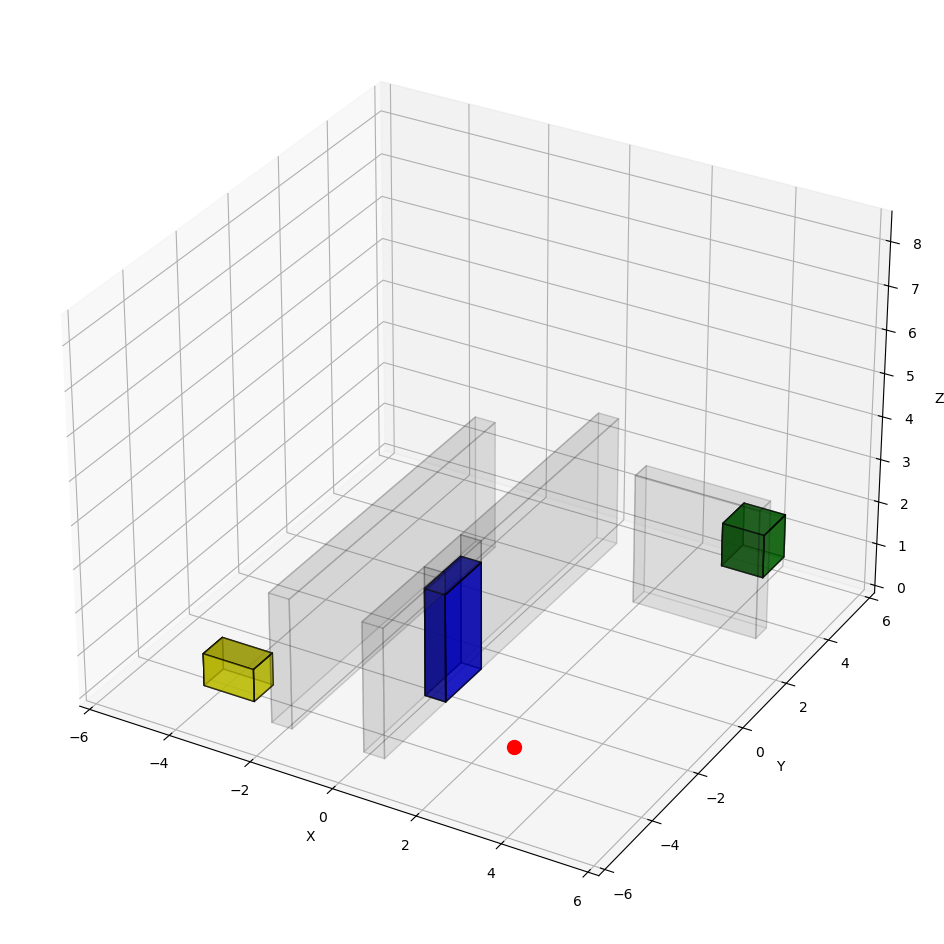

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

for object in fixed_objects:
    # omit the ceiling and the floor
    if object in ["ceiling", "floor"]:
        continue
    center, length, width, height = get_clwh(object)
    X, Y, Z = shapes.make_cuboid(center, (length, width, height))
    ax.plot_surface(X, Y, Z, color='gray', rstride=1, cstride=1, alpha=0.05, linewidth=1., edgecolor='k')

# show key in green, chest in yellow, door in blue
for object in interactive_objects:
    center, length, width, height = get_clwh(object)
    X, Y, Z = shapes.make_cuboid(center, (length, width, height))
    if object == "key":
        ax.plot_surface(X, Y, Z, color='green', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')
    elif object == "chest":
        ax.plot_surface(X, Y, Z, color='yellow', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')
    elif object == "door":
        ax.plot_surface(X, Y, Z, color='blue', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')

# show the initial position of the drone
ax.scatter(x0[0], x0[1], x0[2], color='red', s=100)


ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(0, 8.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [25]:
user_input = [{"role": "user", "content": "I think there might be some valuable items in the chest.\nI want to open it, but a door is blocking the way and it is locked.\nI think there should be a key somewhere to open the door.\nPlease help me find a way to get to the chest."}]
# display the user input only
print(user_input[0]["content"])

I think there might be some valuable items in the chest.
I want to open it, but a door is blocking the way and it is locked.
I think there should be a key somewhere to open the door.
Please help me find a way to get to the chest.


In [26]:
#translator = NL_to_STL(objects, T_max, dt, print_instructions = True)
#spec = translator.extract_STL_formula(user_input)

In [27]:
fixed_objects

{'NE_inside_wall': (2.0, 5.0, 3.0, 3.5, 0.0, 3.0),
 'south_mid_inside_wall': (0.0, 0.5, -5.0, -2.5, 0.0, 3.0),
 'north_mid_inside_wall': (0.0, 0.5, -1.0, 5.0, 0.0, 3.0),
 'west_inside_wall': (-2.25, -1.75, -5.0, 3.5, 0.0, 3.0),
 'top_door': (0.0, 0.5, -2.5, -1, 2.5, 3.0)}

In [28]:
#fixed_objects_to_add = []
fixed_objects_to_add = fixed_objects

In [64]:
#spec = f'STL_formulas.inside_cuboid(objects["key"]).eventually(0, {int(N/2)}) & STL_formulas.inside_cuboid(objects["chest"]).eventually({int(N/2)}, {N})'
spec = 'STL_formulas.outside_cuboid(objects["door"]).until(STL_formulas.inside_cuboid(objects["key"]), 0, N) & STL_formulas.inside_cuboid(objects["chest"]).eventually(0, N) '

# add bounds
spec = spec + f' & STL_formulas.inside_cuboid(objects["bounds"]).always(0, {N})'

# append avoid fixed objects
for object in fixed_objects_to_add:
    spec = spec + f' & STL_formulas.outside_cuboid(fixed_objects["{object}"]).always(0, {N})'

In [65]:
print(spec)
spec = eval(spec)
spec

STL_formulas.outside_cuboid(objects["door"]).until(STL_formulas.inside_cuboid(objects["key"]), 0, N) & STL_formulas.inside_cuboid(objects["chest"]).eventually(0, N)  & STL_formulas.inside_cuboid(objects["bounds"]).always(0, 100) & STL_formulas.outside_cuboid(fixed_objects["NE_inside_wall"]).always(0, 100) & STL_formulas.outside_cuboid(fixed_objects["south_mid_inside_wall"]).always(0, 100) & STL_formulas.outside_cuboid(fixed_objects["north_mid_inside_wall"]).always(0, 100) & STL_formulas.outside_cuboid(fixed_objects["west_inside_wall"]).always(0, 100) & STL_formulas.outside_cuboid(fixed_objects["top_door"]).always(0, 100)


In [66]:
solver = STLSolver(spec, x0, T_max)
x,u = solver.generate_trajectory(dt, max_acc, max_speed, verbose=True)

Setting up optimization problem...
Setup complete in 94.60929083824158 seconds.
<class 'gurobipy.MQuadExpr'>
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 109906 rows, 101218 columns and 281406 nonzeros
Model fingerprint: 0x3aadb67f
Model has 303 quadratic objective terms
Variable types: 66070 continuous, 35148 integer (35148 binary)
Coefficient statistics:
  Matrix range     [3e-01, 1e+03]
  Objective range  [1e+00, 1e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e-01, 1e+100]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 84897 rows and 79555 columns
Presolve time: 1.24s
Presolved: 25009 rows, 21663 columns, 79673 nonzeros
Presolved model has 300 quadra

In [32]:
# save x and u to a file
#np.save('x.npy', x)
#np.save('u.npy', u)

In [33]:
# read x and u from a file
#x = np.load('x.npy')
#u = np.load('u.npy')

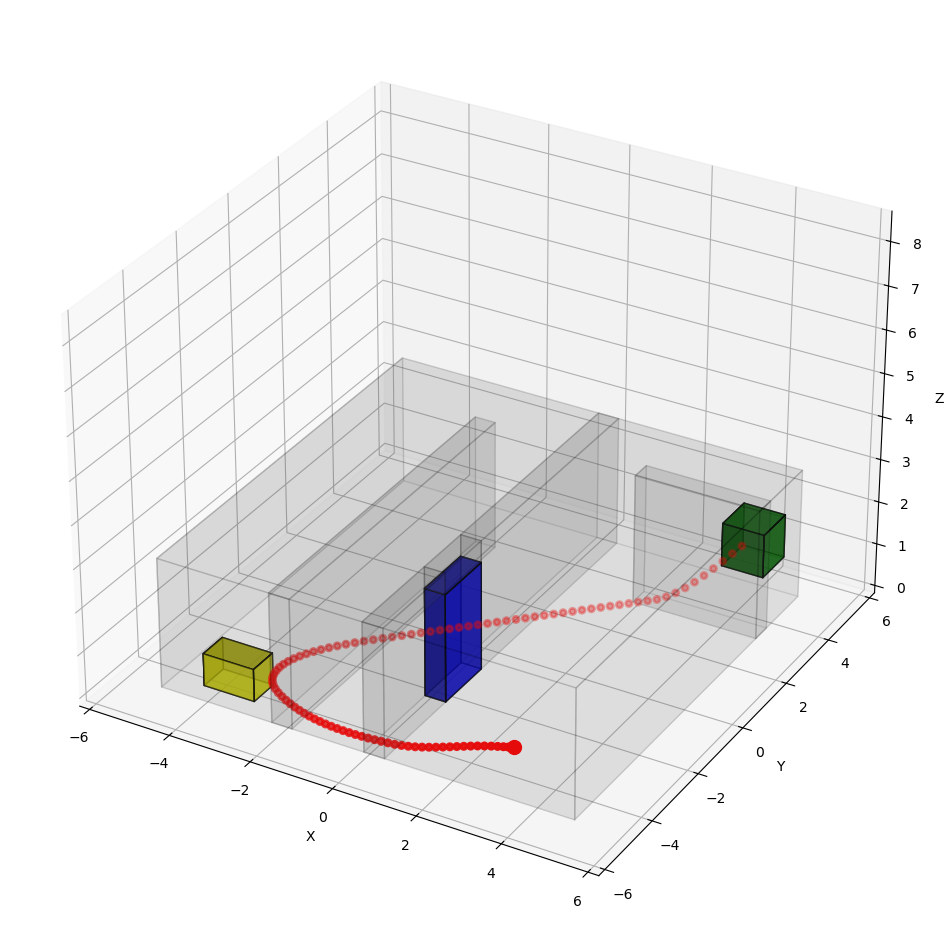

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

for object in fixed_objects:
    center, length, width, height = get_clwh(object)
    X, Y, Z = shapes.make_cuboid(center, (length, width, height))
    ax.plot_surface(X, Y, Z, color='gray', rstride=1, cstride=1, alpha=0.05, linewidth=1., edgecolor='k')

# add bounds
center, length, width, height = get_clwh("bounds")
X, Y, Z = shapes.make_cuboid(center, (length, width, height))
ax.plot_surface(X, Y, Z, color='gray', rstride=1, cstride=1, alpha=0.05, linewidth=1., edgecolor='k')

# show key in green, chest in yellow, door in blue
for object in interactive_objects:
    center, length, width, height = get_clwh(object)
    X, Y, Z = shapes.make_cuboid(center, (length, width, height))
    if object == "key":
        ax.plot_surface(X, Y, Z, color='green', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')
    elif object == "chest":
        ax.plot_surface(X, Y, Z, color='yellow', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')
    elif object == "door":
        ax.plot_surface(X, Y, Z, color='blue', rstride=1, cstride=1, alpha=0.5, linewidth=1., edgecolor='k')

# show the initial position of the drone
ax.scatter(x0[0], x0[1], x0[2], color='red', s=100)

# plot the trajectory
ax.scatter(x[0,:], x[1,:], x[2,:], color='red', linewidth=2)


ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(0, 8.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [69]:
# function to check if the drone is inside the cuboid
def inside_cuboid(x, bounds):
    xmin, xmax, ymin, ymax, zmin, zmax = bounds
    if x[0] >= xmin and x[0] <= xmax and x[1] >= ymin and x[1] <= ymax and x[2] >= zmin and x[2] <= zmax:
        return True
    else:
        return False

In [74]:
print(inside_cuboid(x0, objects["bounds"]))
print(inside_cuboid(x0, objects["key"]))

True
False


In [71]:
inside_array = np.zeros((N, len(objects)))
for t in range(N):
    for i, object in enumerate(objects):
        inside_array[t, i] = inside_cuboid(x[:,t], objects[object])

In [72]:
inside_array.shape

(100, 9)

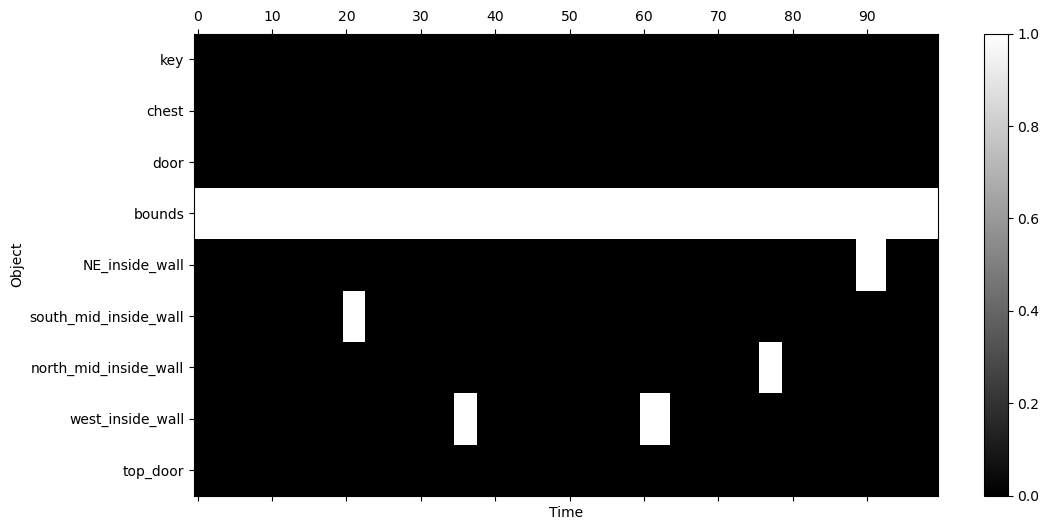

In [73]:
# show at which time the drone is inside the objects
fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.matshow(inside_array.T, aspect='auto', cmap='gray')
ax.set_xlabel('Time')
ax.set_ylabel('Object')
ax.set_yticks(np.arange(len(objects)))
ax.set_yticklabels(objects.keys())
ax.set_xticks(np.arange(0, N, 10))
fig.colorbar(cax)
plt.show()

In [75]:
print(objects["door"])

(0.0, 0.5, -2.5, -1, 0.0, 2.5)


In [84]:
np.round(x[:2,:].T,1)

array([[ 3. , -4. ],
       [ 3. , -4. ],
       [ 3. , -4. ],
       [ 2.9, -4. ],
       [ 2.8, -4. ],
       [ 2.6, -4. ],
       [ 2.5, -4.1],
       [ 2.4, -4.1],
       [ 2.2, -4.1],
       [ 2.1, -4.1],
       [ 1.9, -4.2],
       [ 1.8, -4.2],
       [ 1.6, -4.2],
       [ 1.5, -4.2],
       [ 1.3, -4.3],
       [ 1.2, -4.3],
       [ 1. , -4.3],
       [ 0.9, -4.4],
       [ 0.7, -4.4],
       [ 0.6, -4.4],
       [ 0.4, -4.4],
       [ 0.3, -4.5],
       [ 0.1, -4.5],
       [-0. , -4.5],
       [-0.2, -4.5],
       [-0.3, -4.5],
       [-0.5, -4.5],
       [-0.6, -4.5],
       [-0.8, -4.5],
       [-0.9, -4.5],
       [-1.1, -4.5],
       [-1.2, -4.5],
       [-1.4, -4.5],
       [-1.5, -4.4],
       [-1.7, -4.4],
       [-1.8, -4.4],
       [-2. , -4.3],
       [-2.1, -4.3],
       [-2.3, -4.2],
       [-2.4, -4.1],
       [-2.6, -4. ],
       [-2.7, -4. ],
       [-2.9, -3.9],
       [-3. , -3.7],
       [-3.1, -3.6],
       [-3.2, -3.5],
       [-3.2, -3.4],
       [-3.2,

(-6.0, 6.0)

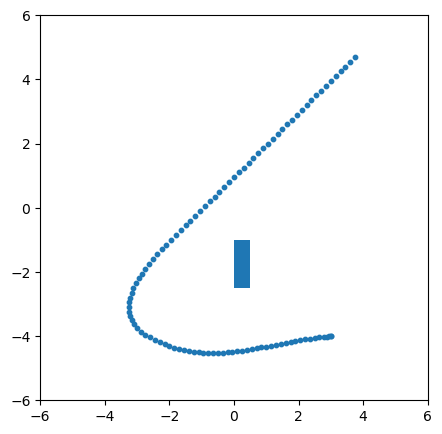

In [92]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
plt.scatter(x[0,:], x[1,:], s=10)
ax.add_patch(plt.Rectangle((0., -2.5), .5, 1.5, ))
plt.xlim(-6, 6)
plt.ylim(-6, 6)

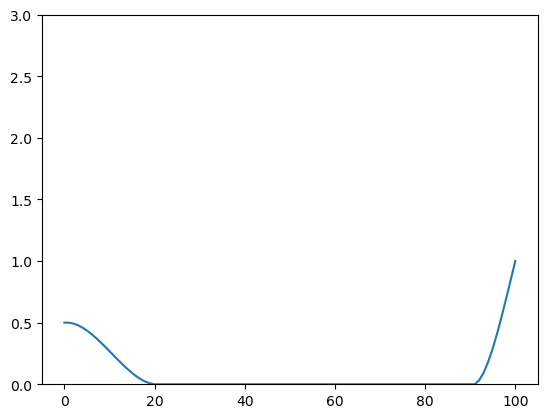

In [96]:
plt.plot(x[2,:])
plt.ylim(0, 3);